# Tesis
#### Ana Lucia Diaz Leppe

In [44]:
# Data Management
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Sklearn
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Data

In [45]:
confirmedcovid= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmedcovid.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/18/20  9/19/20  9/20/20  \
0        0        0        0        0  ...    38883    38919    39044   
1        0        0        0        0  ...    12073    12226    12385   
2        0        0        0        0  ...    49413    49623    49826   
3        0        0        0        0  ...     1564     1564     1564   
4        0        0        0        0  ...     3848     3901     3991   

   9/21/20  9/22/20  9/23/20  9/24/20  9/25/20  9/26/20  9/27/20  
0    39074    39096    39145    39170    39186    39192    39227  
1    12535    12666    12787    12921    13045    13153    13259  
2    50023    50214    50400    50579    50754    50914    51067  
3     1681     1681     1753     1753     1836     1836     1836  
4     4117     4236     4363     4475     4590     4672     4718  

[5 rows x 254 columns]

266
266


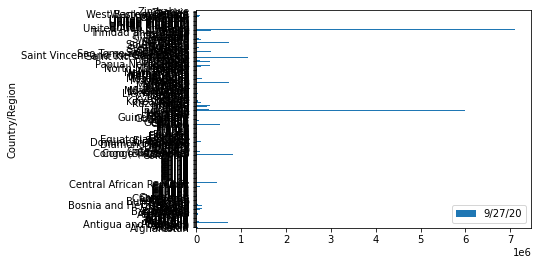

In [46]:
ultimo_confirmado = confirmedcovid[confirmedcovid.columns[-1]]
print(len(ultimo_confirmado))
pais_confirmado = confirmedcovid[confirmedcovid.columns[1]]
print(len(ultimo_confirmado))
width = 0.35 
#confirmedcovid.plot.bar(x = 'Country/Region', y = '5/10/20')
all_confirmed2 = confirmedcovid.plot.barh(x = 'Country/Region', y = confirmedcovid.columns[-1])

In [47]:
order_confirmed = confirmedcovid.sort_values(confirmedcovid.columns[-1], ascending=True)
ultimo_confirmado_ordenado = order_confirmed[order_confirmed.columns[-1]]
#print("confirmados",ultimo_confirmado_ordenado)
ultimo_confirmado_ordenado_2 = order_confirmed[order_confirmed.columns[1]]
#print("paises", ultimo_confirmado_ordenado_2 )

Provincias Mas Afectadas


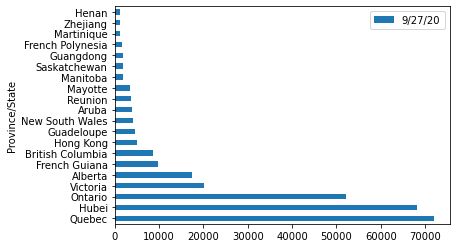

In [48]:
confirmedcovid1 = confirmedcovid.dropna()
top_covid_confirmed = confirmedcovid1.nlargest(20, confirmedcovid1.columns[-1])
top_covid_confirmed.head()
top_covid_confirmed_graph = top_covid_confirmed.plot.barh(x = 'Province/State', y = top_covid_confirmed.columns[-1])
print("Provincias Mas Afectadas")

Provincias Menos Afectadas


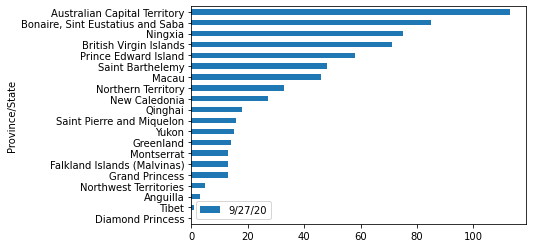

In [49]:
confirmedcovid1 = confirmedcovid.dropna()
top_covid_confirmed = confirmedcovid1.nsmallest(20, confirmedcovid1.columns[-1])
top_covid_confirmed.head()
top_covid_confirmed_graph = top_covid_confirmed.plot.barh(x = 'Province/State', y = top_covid_confirmed.columns[-1])
print("Provincias Menos Afectadas")

In [50]:
print("\n----------- Calcular media de confirmados -----------\n")
print(ultimo_confirmado.mean())
 
print("\n----------- Calcular mediana de confirmados -----------\n")
print(ultimo_confirmado.median())
 
print("\n----------- Calcular moda de confirmados -----------\n")
print(ultimo_confirmado.mode())

print("\n----------- Calcular moda de nombre confirmados -----------\n")
print(pais_confirmado.mode())
 


----------- Calcular media de confirmados -----------

124043.43609022556

----------- Calcular mediana de confirmados -----------

4373.5

----------- Calcular moda de confirmados -----------

0    13
1    27
dtype: int64

----------- Calcular moda de nombre confirmados -----------

0    China
dtype: object


MOST AFFECTED COUNTRY


Province/State        NaN
Country/Region         US
Lat                    40
Long                 -100
1/22/20                 1
                   ...   
9/23/20           6933548
9/24/20           6977658
9/25/20           7032712
9/26/20           7078089
9/27/20           7115008
Name: 242, Length: 254, dtype: object

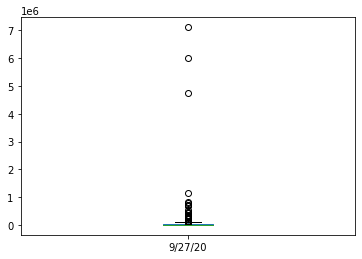

In [51]:
ax = ultimo_confirmado.plot.box()
print("MOST AFFECTED COUNTRY")
confirmedcovid.loc[confirmedcovid[confirmedcovid.columns[-1]].idxmax()]

Paises Menos Afectados


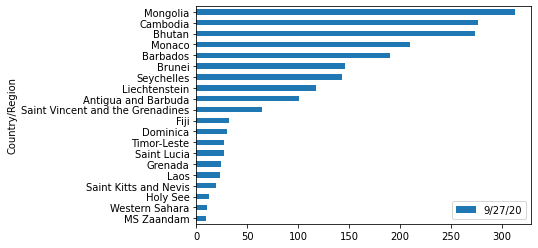

In [52]:
print("Paises Menos Afectados")
ultimo_confirmado = confirmedcovid[confirmedcovid.columns[-1]]
clean_countries = confirmedcovid.groupby('Country/Region', as_index=False)[confirmedcovid.columns[-1]].sum()
clean_countries.head()
top_covid_confirmed = clean_countries.nsmallest(20, clean_countries.columns[-1])
top_covid_confirmed.head()
top_covid_confirmed_graph = top_covid_confirmed.plot.barh(x = 'Country/Region', y = top_covid_confirmed.columns[-1])

Paises Mas Afectados


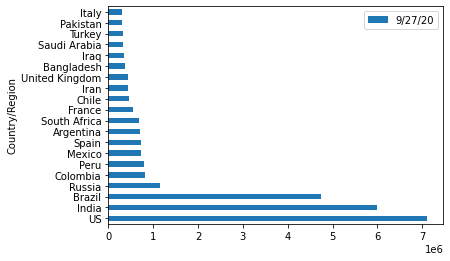

In [53]:
print("Paises Mas Afectados")
ultimo_confirmado = confirmedcovid[confirmedcovid.columns[-1]]
clean_countries = confirmedcovid.groupby('Country/Region', as_index=False)[confirmedcovid.columns[-1]].sum()
clean_countries.head()
top_covid_confirmed = clean_countries.nlargest(20, clean_countries.columns[-1])
top_covid_confirmed.head()
top_covid_confirmed_graph = top_covid_confirmed.plot.barh(x = 'Country/Region', y = top_covid_confirmed.columns[-1])

In [54]:
ultimo_confirmado.sum()

32995554

In [55]:
columnas = list(confirmedcovid.columns) 
nombre_fecha_actual = columnas[-1]
print(nombre_fecha_actual)

9/27/20
